## PCA MNIST
Hacer una intro

#### Importo librerías

In [26]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans

import seaborn as sns
#import os
#import gzip
#import sys

#rom sklearn.neighbors import KernelDensity
#from sklearn.preprocessing import normalize

#### Importo el dataset (Kaggle)

In [2]:
df = pd.read_csv('./digit-recognizer/train.csv')

In [4]:
y = df['label']
X = df.iloc[:, 1:df.shape[1]]

In [5]:
print('Formato del dataset: {}'.format(X.shape))

Formato del dataset: (42000, 784)


In [6]:
print('Clases distintas: {}'.format(y.unique()))

Clases distintas: [1 0 4 7 3 5 8 9 2 6]


#### Muestro un número

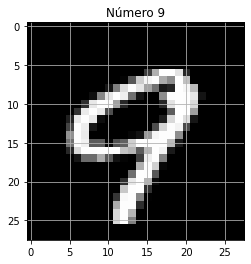

In [7]:
plt.grid(True)
plt.imshow(X.iloc[100,:].to_numpy().reshape((28,28)), cmap = 'gray')
plt.title('Número 9')
plt.show()

#### Muestro varios números

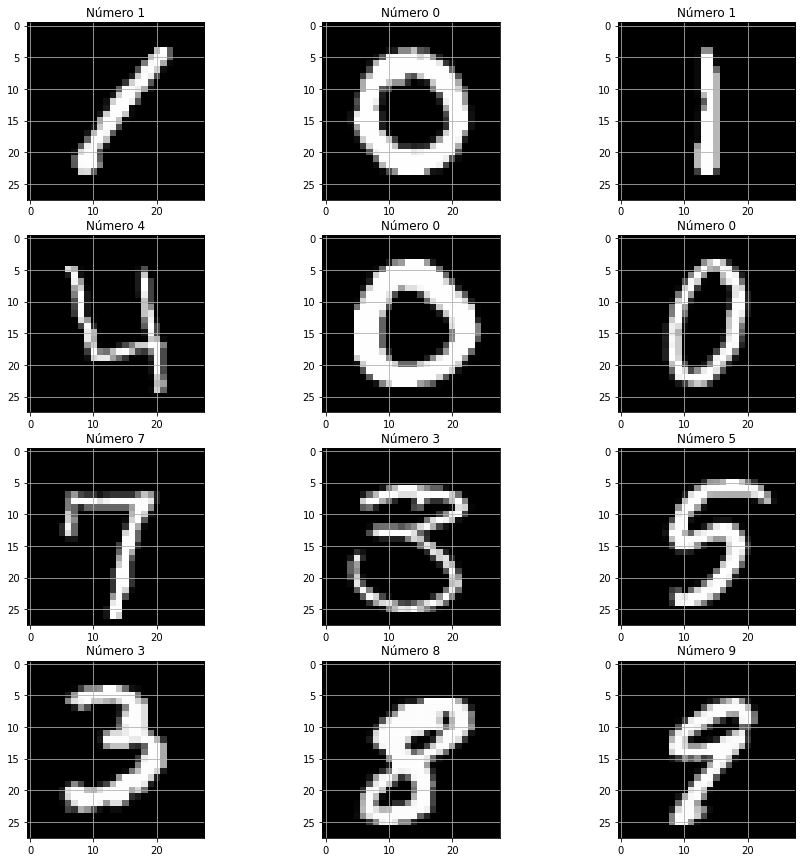

In [8]:
fig, axs = plt.subplots(4, 3, figsize=(15,15))
for i in range(4):
    for j in range(3):
        axs[i, j].grid(True)
        axs[i, j].imshow(X.iloc[3*i + j,:].to_numpy().reshape((28,28)), cmap = 'gray')
        axs[i, j].set_title('Número {}'.format(y.iloc[3*i + j]))
plt.show()

#### Aplico PCA

Busco explicar el 90% de la varianza de los datos.

In [9]:
# Estandarizo

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca_numbers = PCA(n_components = 0.9, random_state = 12)
pca_numbers.fit(X_scaled)
X_pca = pca_numbers.transform(X_scaled)
X_pca_transform = pca_numbers.inverse_transform(X_pca)

print("Cantidad de componentes principales {}".format(pca_numbers.components_.shape[0]))

pca_numbers2 = PCA(random_state = 12)
pca_numbers2.fit(X_scaled)

Cantidad de componentes principales 229


PCA(random_state=12)

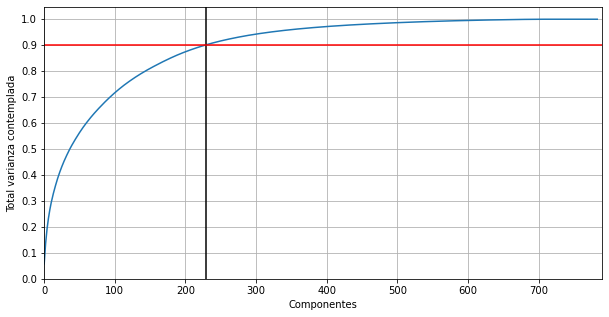

In [10]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca_numbers2.explained_variance_ratio_)); plt.grid(True);
plt.xlabel('Componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 790)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(229, c = 'k')
plt.axhline(0.9, c = 'r')
plt.show();

#### Grafico las primeras 2 componentes

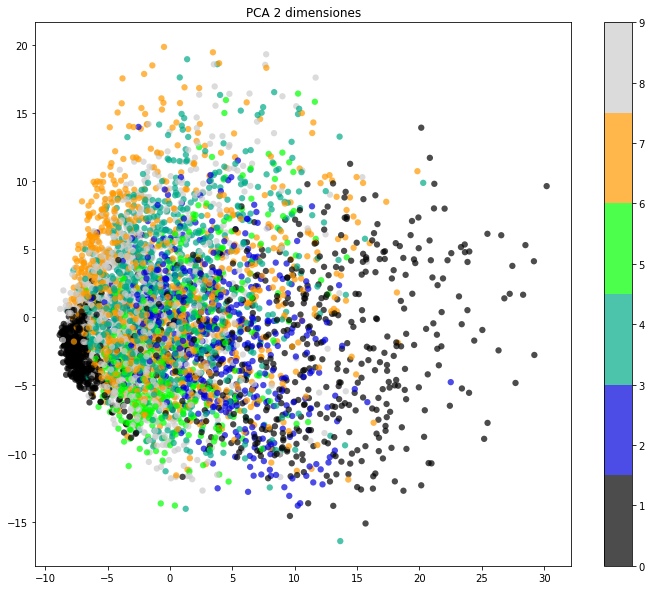

In [12]:
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:5000, 0], X_pca[:5000, 1], c = y[:5000], edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('PCA 2 dimensiones');

#### Imagen reconstruida

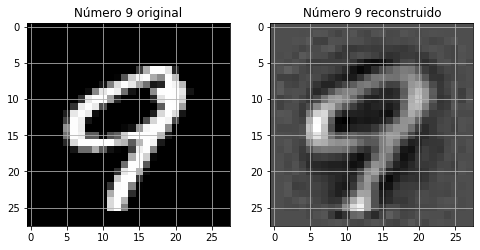

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(8,12))
axs[0].grid(True)
axs[0].imshow(X.iloc[100,:].to_numpy().reshape((28,28)), cmap = 'gray')
axs[0].set_title('Número 9 original')
axs[1].grid(True)
axs[1].imshow(X_pca_transform[100,:].reshape((28,28)), cmap = 'gray')
axs[1].set_title('Número 9 reconstruido')
plt.show()

#### Matriz de correlación del dataset reducido

In [15]:
df_train = pd.DataFrame(X_pca_transform, columns = X.columns)
corr = df_train.corr()
corr.shape

(784, 784)

In [19]:
corr_reduc = corr.iloc[0:20,0:20]

<AxesSubplot:>

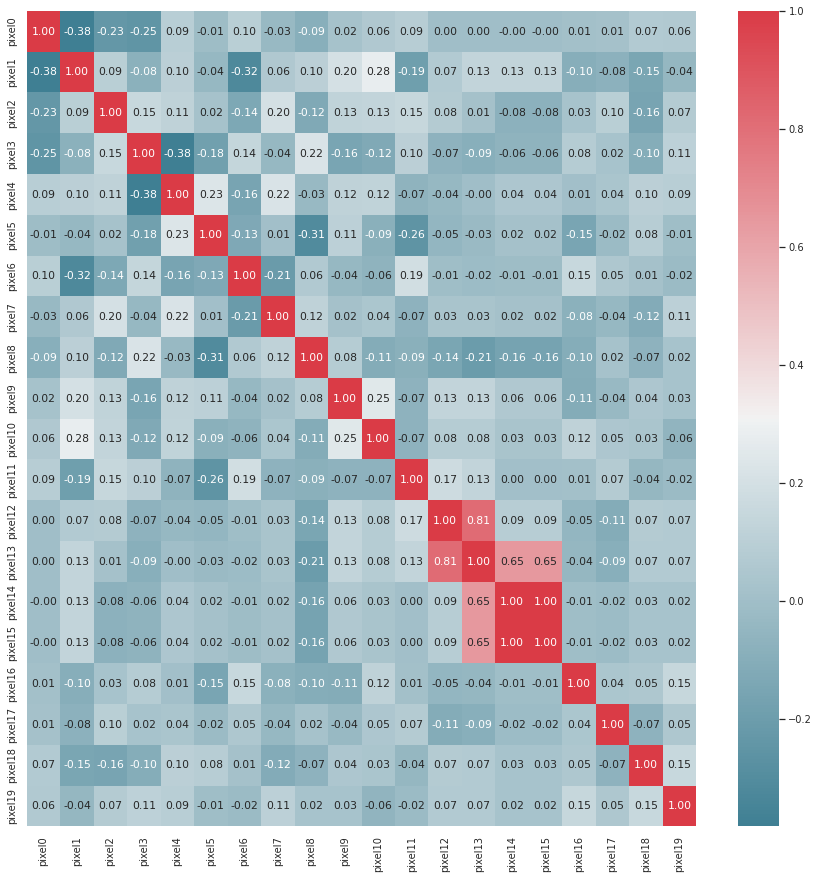

In [23]:
sns.set(font_scale = 0.9, rc = {'figure.figsize':(15,15)})
sns.heatmap(corr_reduc, cmap = sns.diverging_palette(220,10,as_cmap=True),annot = True,fmt = ".2f")

#### Clusterización

In [27]:
kmeans = KMeans(n_clusters = 10, n_init = 100, random_state = 12)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

/tmp/ipykernel_2513/1279176891.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


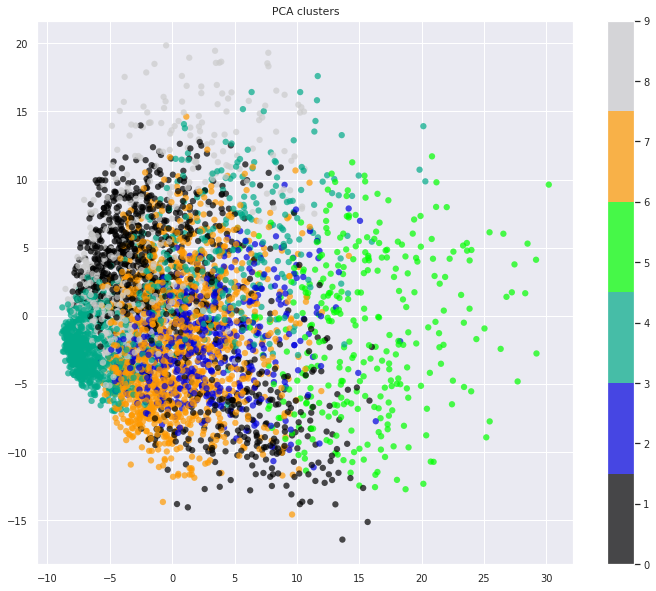

In [32]:

plt.figure(figsize=(12,10))
plt.scatter(X_pca[:5000, 0], X_pca[:5000, 1], c = cluster_labels[:5000], edgecolor = 'none', alpha = 0.7, s = 40, cmap = plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('PCA clusters');

#### Gráfico de inercia

In [33]:
inercia = [] #guardo para graficar
for i in range(1, 10 + 1):
    kmeans = KMeans(n_clusters = i, n_init=100, random_state = 12).fit(X_pca)
    inercia.append(np.sqrt(kmeans.inertia_))

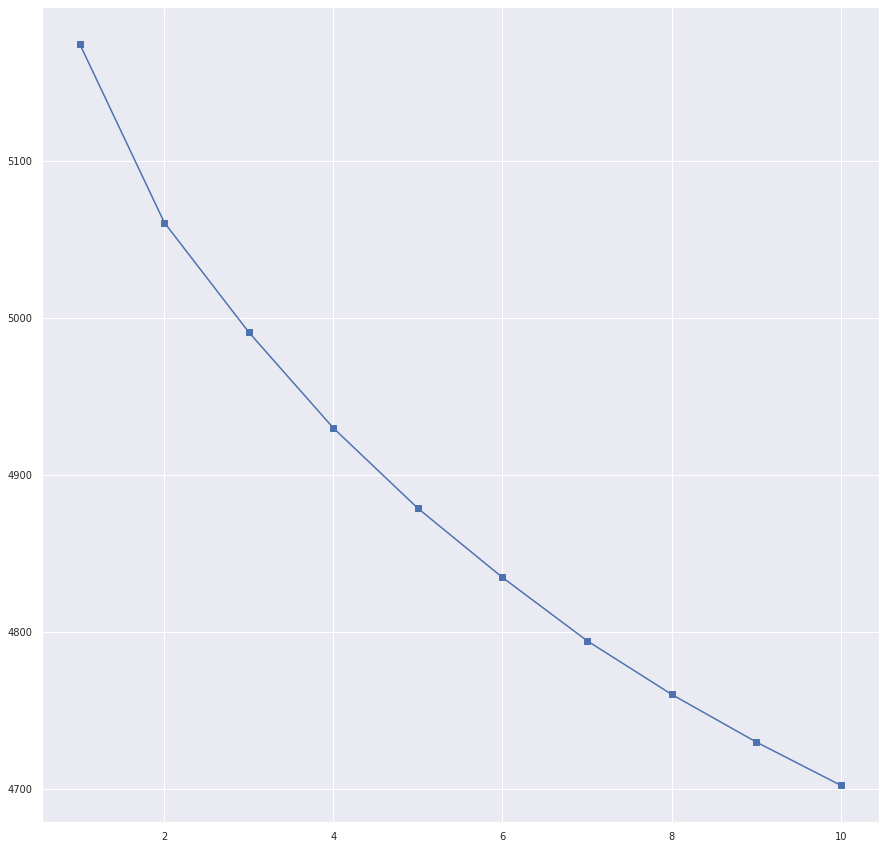

In [36]:
plt.plot(range(1, 11), inercia, marker='s')